In [3]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

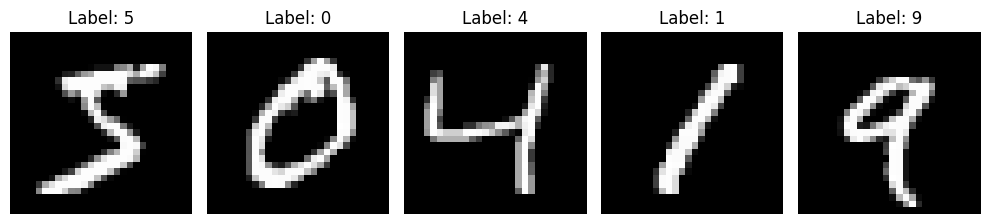

In [5]:
# Visualize some sample images
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Preprocess the data
# Reshape images to add channel dimension and normalize
X_train = train_images.reshape((60000, 28, 28, 1)) / 255.0
X_test = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [7]:
# One-hot encode the labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [43]:
# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    # First Convolutional Layer
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Layer
    layers.Conv2D(filters = 64, kernal_size = (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the 2D feature maps
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    
    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [44]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
# Print model summary
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the model with verbose output
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2,  # Use validation split for notebook
                    verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7968 - loss: 0.6526 - val_accuracy: 0.9743 - val_loss: 0.0896
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9648 - loss: 0.1125 - val_accuracy: 0.9826 - val_loss: 0.0631
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9748 - loss: 0.0822 - val_accuracy: 0.9857 - val_loss: 0.0509
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9813 - loss: 0.0628 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9809 - loss: 0.0601 - val_accuracy: 0.9873 - val_loss: 0.0421
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9838 - loss: 0.0515 - val_accuracy: 0.9873 - val_loss: 0.0406
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9892 - val_loss: 0.0373
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9859 - loss: 0.0450 - val_accuracy: 0.

In [47]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_accuracy * 100:.2f}%')


Test accuracy: 99.13%


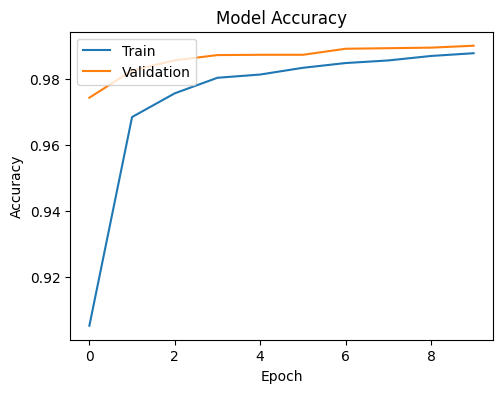

In [48]:
# Visualize training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

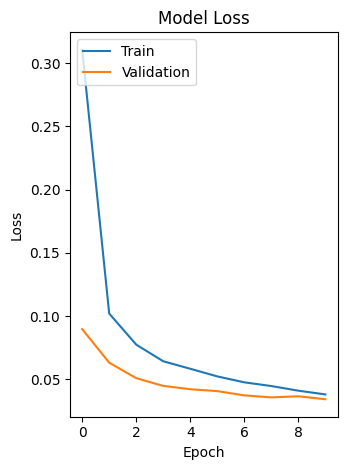

In [49]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
# Predict on some test images
predictions = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


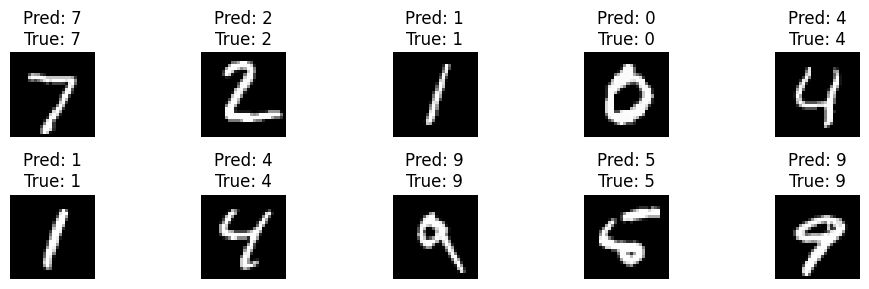

In [51]:

# Visualize predictions
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()